Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.tail(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#### here our target column is "loan Status",this is not continous data so this is classification problem.maximum column is in categorical form..

In [4]:
data.shape

(614, 13)

#### in this data 614 rows and 13 column..

In [5]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
476,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y


In [9]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


#### describe function show only numerical value column but when use (include=all) function it showes all..here we can see that null value are present in LoanAmount,Loan_Amount_Term,Credit_History..

Finding unique values for each column ,TO understand which column is categorical and which one is Continuous
,Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous

In [10]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

##### here we can see that 4 column(loan-id,applicant income,coapplicant income,loan amount) are continoues and other are catogorical column

In [12]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Loan_ID']
data = data.drop(UselessColumns,axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Visualization Exploratory Data Analysis(EDA)

#### We use bar charts to see how the data is distributed for these categorical columns.

### Correlation

<AxesSubplot:xlabel='Gender', ylabel='count'>

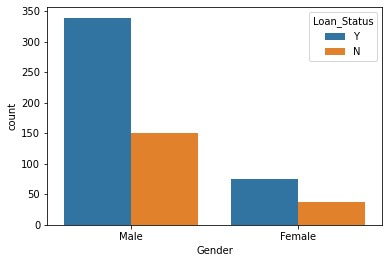

In [18]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

#### male get loan highest as comparison to female..

<AxesSubplot:xlabel='Married', ylabel='count'>

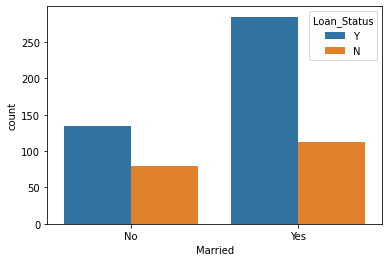

In [20]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

#### if a person is married then more chances to get the loan rather then not married..

<AxesSubplot:xlabel='Dependents', ylabel='count'>

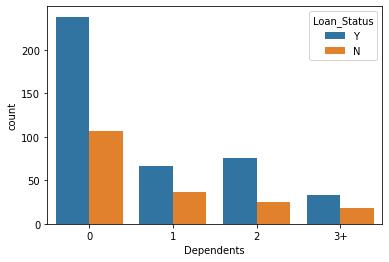

In [21]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

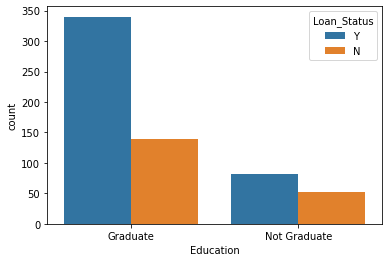

In [22]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

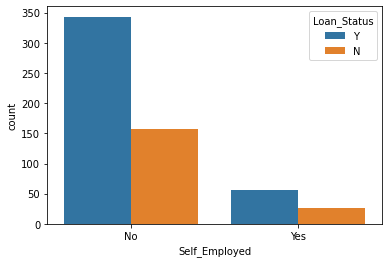

In [23]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

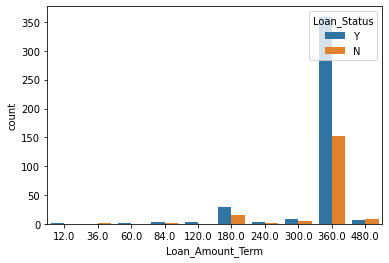

In [24]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

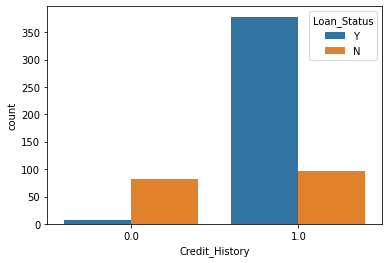

In [26]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

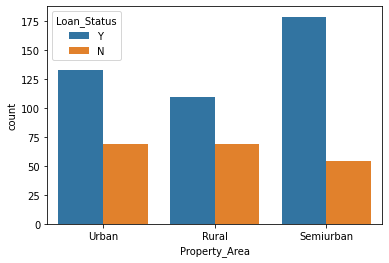

In [27]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

### If there is a column which shows too skewed distribution like "Loan_Amount_Term" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column. In this data, all the categorical columns except "Loan_Amount_Term" have satisfactory distribution for machine learning.

## Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

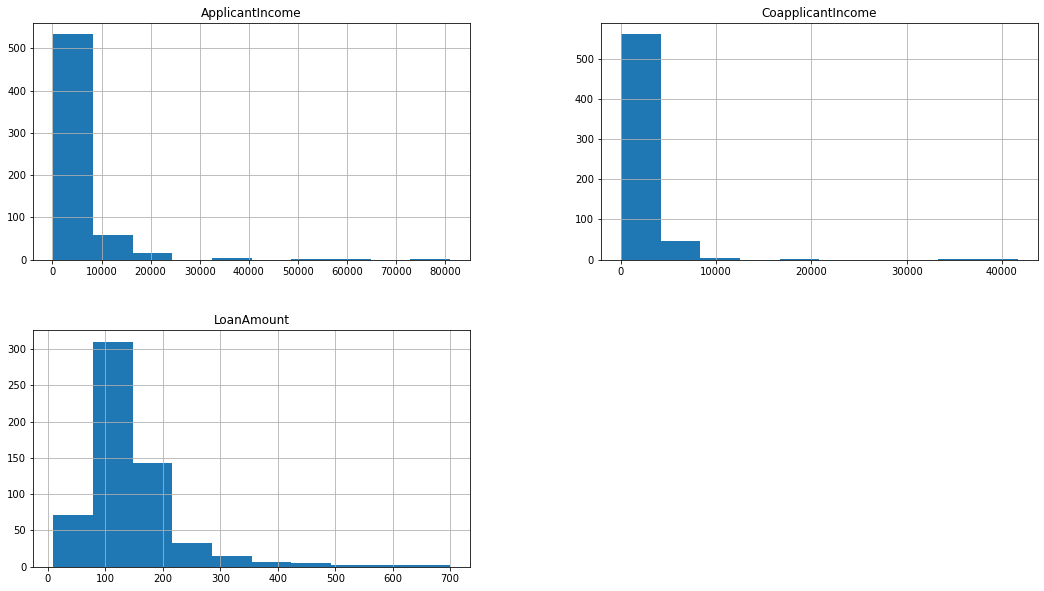

In [28]:
# Plotting histograms of multiple columns together
data.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "LoanAmount", there are around 320 rows in data that has a Loan Amount between 90 to 150.

## Removing Outliers

#### Replacing outliers for 'ApplicantIncome'

There are below two options to treat outliers in the data.
Option-1: Delete the outlier Records. Only if there are just few rows lost.
Option-2: Impute the outlier values with a logical business value
Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

In [29]:
# Finding nearest values to 30000 mark
data['ApplicantIncome'][data['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

Above result shows the nearest logical value is 23803, hence, replacing any value above 30000 with it.

In [31]:
# Replacing outliers with nearest possibe value
data['ApplicantIncome'][data['ApplicantIncome']>30000] = 23803

#### Replacing outliers for 'CoapplicantIncome'

In [32]:
# Finding nearest values to 15000 mark
data['CoapplicantIncome'][data['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

Above result shows the nearest logical value is 11300, hence, replacing any value above 15000 with it.

In [33]:
# Replacing outliers with nearest possibe value
data['CoapplicantIncome'][data['CoapplicantIncome']>15000] = 11300

### The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

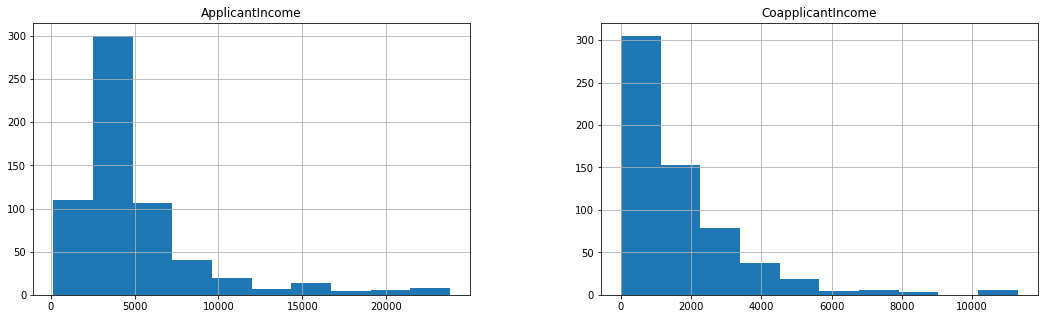

In [34]:
data.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

In [35]:
# number of missing values in each column
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### there is few missing value are present in some column...so we should aplly imputation method but all column  where missing value are present is catogorical column with the value "yes"  or "no"...and we cant find the mean vlue for this..so don't fill this missing value

In [36]:
#  droping the missing value
data = data.dropna()

In [37]:
# check the missing values in each column..
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### see all null data is removed

### correlation : Categorical Vs Continuous -- Box Plots

### Anova Test

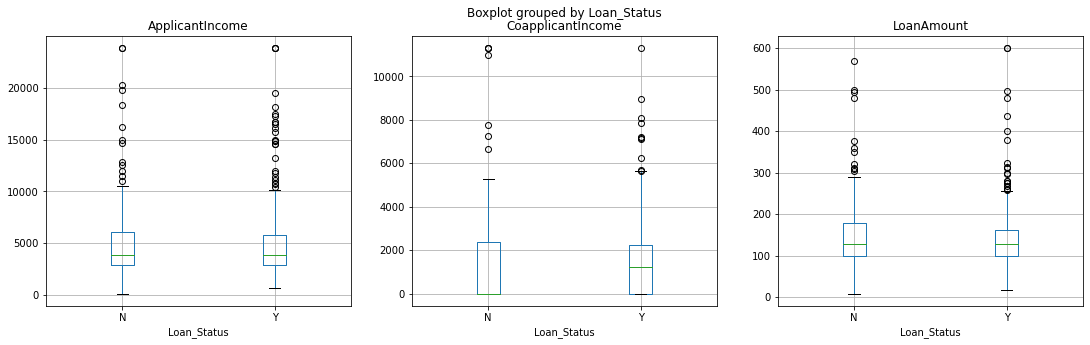

In [38]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.
all three continuous predictors are not correlated with the target variable.

## Statistical Feature Selection (Categorical Vs Continuous) 

In [39]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [41]:
# Calling the function to check which coninoues variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=data, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.5797007035863009
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6330087471508343
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.11642791040849834


[]

## CorRelation: Categorical Vs Categorical

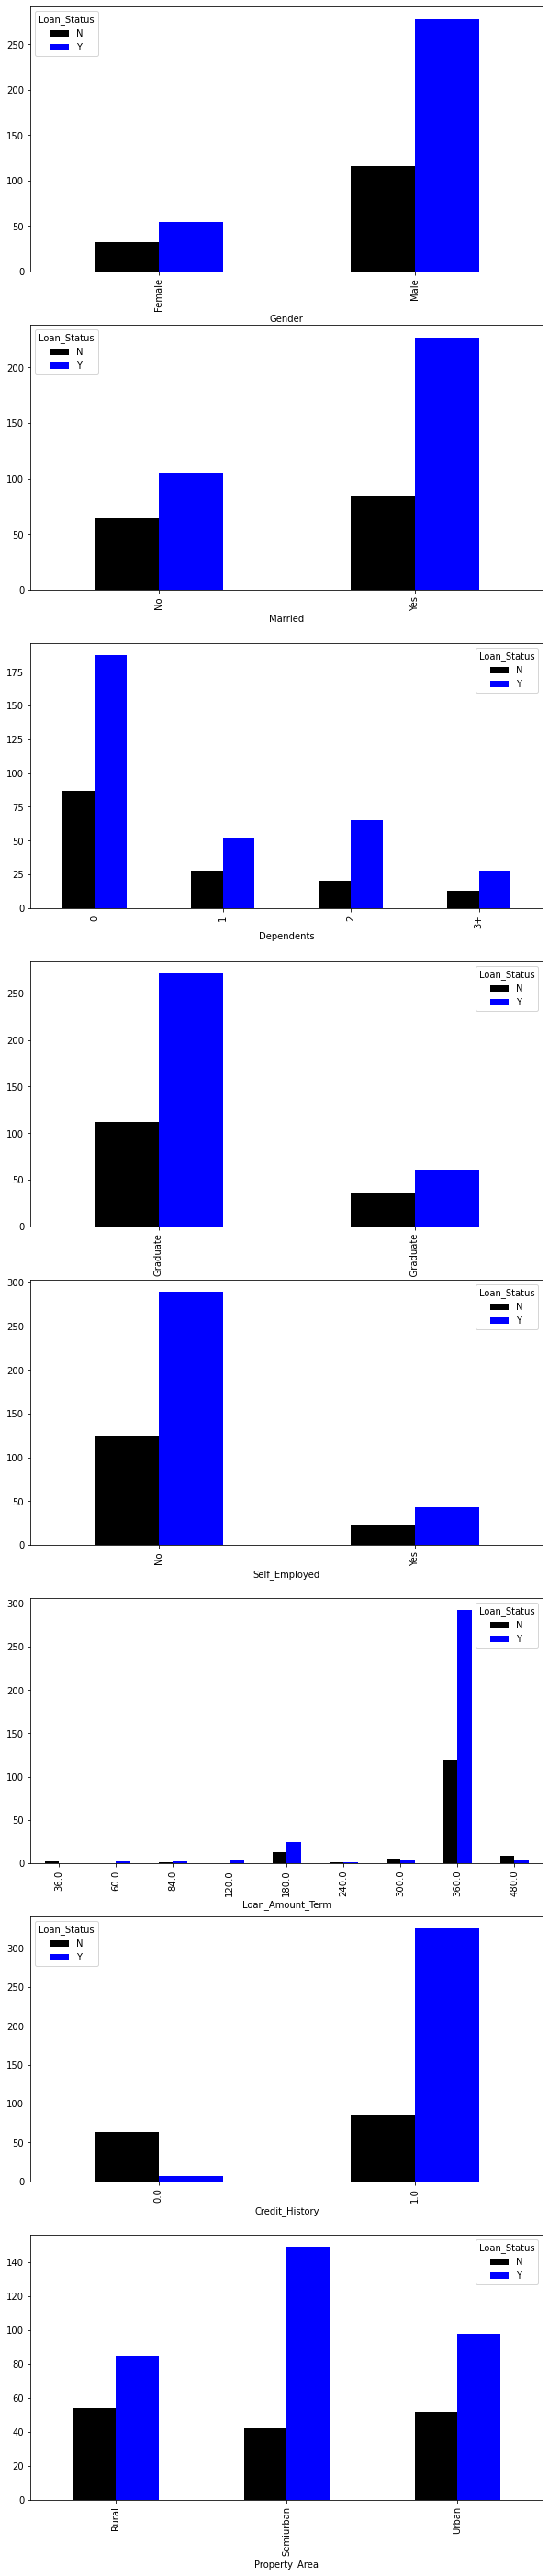

In [42]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Loan_Status'])
    CrossTabResult.plot.bar(color=['black','blue'], ax=PlotCanvas[i])

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [43]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [44]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=data, 
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.19901831142812107
Married is correlated with Loan_Status | P-Value: 0.018405456386355375
Dependents is NOT correlated with Loan_Status | P-Value: 0.4072099984868268
Education is NOT correlated with Loan_Status | P-Value: 0.16872400009733118
Self_Employed is NOT correlated with Loan_Status | P-Value: 0.5371943232746994
Loan_Amount_Term is correlated with Loan_Status | P-Value: 0.023930638197946847
Credit_History is correlated with Loan_Status | P-Value: 2.135981766869101e-30
Property_Area is correlated with Loan_Status | P-Value: 0.0022139594148752133


['Married', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

### Based on the above tests, selecting the final columns for machine learning

In [45]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=data[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban
5,Yes,Graduate,1.0,Urban


In [46]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing

### Label encoding

In [47]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban
5,1,1,1.0,Urban


### Converting the nominal variable to numeric using get_dummies()

In [49]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=data['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y
5,1,1,1.0,0,0,1,Y


## Splitting the data into Training and Testing sample

Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [50]:
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [51]:
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


In [65]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Standardization/Normalization

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [66]:
PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(336, 6)
(336,)
(144, 6)
(144,)


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm

Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       1.00      0.34      0.51        44
           Y       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

[[ 15  29]
 [  0 100]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.75328947 0.79295712 0.73547619 0.76504914 0.73547619 0.73547619
 0.83896665 0.84471831 0.79       0.83666667]

Final Average Accuracy of the model: 0.78


## Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           N       1.00      0.34      0.51        44
           Y       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

[[ 15  29]
 [  0 100]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.75328947 0.79295712 0.73547619 0.76504914 0.73547619 0.73547619
 0.83896665 0.84471831 0.79       0.83666667]

Final Average Accuracy of the model: 0.78


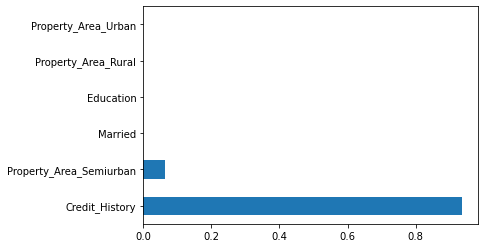

In [68]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

print(clf)

DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           N       1.00      0.34      0.51        44
           Y       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

[[ 15  29]
 [  0 100]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.75328947 0.79295712 0.73547619 0.76504914 0.73547619 0.73547619
 0.83896665 0.84471831 0.79       0.83666667]

Final Average Accuracy of the model: 0.78


<AxesSubplot:>

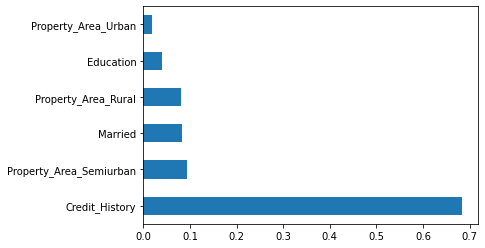

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


# AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           N       1.00      0.34      0.51        44
           Y       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

[[ 15  29]
 [  0 100]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.75328947 0.79295712 0.73547619 0.76504914 0.73547619 0.73547619
 0.83896665 0.84471831 0.79       0.83666667]

Final Average Accuracy of the model: 0.78


<AxesSubplot:>

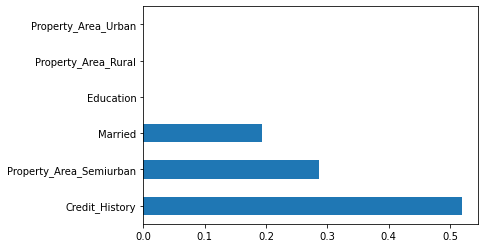

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

print(clf)

AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# KNN

In [71]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

print(clf)

KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           N       0.57      0.59      0.58        44
           Y       0.82      0.80      0.81       100

    accuracy                           0.74       144
   macro avg       0.69      0.70      0.69       144
weighted avg       0.74      0.74      0.74       144

[[26 18]
 [20 80]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.53719512 0.69426407 0.71289062 0.55803571 0.63085938 0.69701405
 0.69701405 0.6375     0.63994307 0.71744792]

Final Average Accuracy of the model: 0.65


# SVM

In [72]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score


Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           N       1.00      0.34      0.51        44
           Y       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

[[ 15  29]
 [  0 100]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.75328947 0.79295712 0.73547619 0.76504914 0.73547619 0.73547619
 0.83896665 0.84471831 0.79       0.83666667]

Final Average Accuracy of the model: 0.78


## Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score


# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           N       1.00      0.34      0.51        44
           Y       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144

[[ 15  29]
 [  0 100]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.75328947 0.79295712 0.73547619 0.76504914 0.73547619 0.73547619
 0.83896665 0.84471831 0.79       0.83666667]

Final Average Accuracy of the model: 0.78


#### I am choosing Adaboost as the final model since it is very fast and I observe that it is using the predictors better by looking at its variable importance chart. It is not letting a single predictor dominate the decision, which is good.

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using the Adaboost algorithm with final hyperparamters

DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Training the model on 100% Data available
FinalAdaboostModel=clf.fit(X,y)

In [75]:
FinalAdaboostModel

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)

## Best model save

In [78]:
import pickle
import os
# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Dell


In [87]:
# Calling the function for some loan applications
def PredictLoanStatus(InputLoanDetails):

    NewLoanApplications=pd.DataFrame(
data=[['No','Graduate',1,'Urban'],
     ['No','Graduate',0,'Urban']],
columns=['Married','Education','Credit_History','Property_Area'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  Married Education  Credit_History Property_Area
0      No  Graduate               1         Urban
1      No  Graduate               0         Urban
